In [55]:
import warnings
import torch
from molecule import MoleculeTrainer
from gflownet.config import init_empty, Config
from rdkit.Chem.Draw import MolsToGridImage
import gflownet

In [58]:
# Model class must be defined somewhere
state = torch.load("./save_test/model_final_save.pt", weights_only=False)
#model = statemodel.eval()
state["models_state_dict"]

[OrderedDict([('transf.x2h.0.weight',
               tensor([[ 0.1656, -0.0919, -0.1404,  ..., -0.2002,  0.1510, -0.0748],
                       [ 0.0333,  0.0664,  0.1546,  ..., -0.1405, -0.1689, -0.1862],
                       [-0.0239,  0.1392, -0.0032,  ..., -0.1750, -0.0730,  0.0157],
                       ...,
                       [ 0.1268, -0.1735,  0.1937,  ..., -0.1719,  0.1252, -0.1854],
                       [ 0.1052,  0.0023, -0.1850,  ...,  0.0290, -0.1368, -0.0390],
                       [ 0.1495,  0.2098, -0.0468,  ..., -0.1324,  0.1966, -0.1904]])),
              ('transf.x2h.0.bias',
               tensor([-0.1376,  0.1712,  0.0805, -0.1349, -0.1295,  0.1647,  0.0719, -0.1746,
                        0.1305,  0.0478, -0.1928,  0.0263,  0.0041, -0.0678,  0.0432, -0.1876,
                        0.1003,  0.0974, -0.2083, -0.1455,  0.1472,  0.0273,  0.0628, -0.1177,
                        0.1191, -0.1168,  0.1749, -0.1426, -0.0660, -0.0895,  0.1637,  0.1713,
     

In [59]:
model = gflownet.models.graph_transformer.GraphTransformerGFN(state["env_ctx"],state["cfg"])
model.load_state_dict(state["models_state_dict"][0])
model.eval()

GraphTransformerGFN(
  (transf): GraphTransformer(
    (x2h): Sequential(
      (0): Linear(in_features=21, out_features=128, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=128, out_features=128, bias=True)
      (3): LeakyReLU(negative_slope=0.01)
      (4): Linear(in_features=128, out_features=128, bias=True)
    )
    (e2h): Sequential(
      (0): Linear(in_features=3, out_features=128, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=128, out_features=128, bias=True)
      (3): LeakyReLU(negative_slope=0.01)
      (4): Linear(in_features=128, out_features=128, bias=True)
    )
    (c2h): Sequential(
      (0): Linear(in_features=1, out_features=128, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=128, out_features=128, bias=True)
      (3): LeakyReLU(negative_slope=0.01)
      (4): Linear(in_features=128, out_features=128, bias=True)
    )
    (graph2emb): ModuleList(
      (0):

In [60]:
state["cfg"]


{'desc': 'noDesc', 'log_dir': 'save_test', 'device': 'cpu', 'seed': 0, 'validate_every': 1000, 'checkpoint_every': 2, 'store_all_checkpoints': False, 'print_every': 1, 'start_at_step': 0, 'num_final_gen_steps': None, 'num_validation_gen_steps': 1, 'num_training_steps': 10, 'num_workers': 0, 'hostname': None, 'pickle_mp_messages': False, 'git_hash': 'f106cde', 'overwrite_existing_exp': False, 'algo': {'method': 'TB', 'num_from_policy': 64, 'num_from_dataset': 0, 'valid_num_from_policy': 64, 'valid_num_from_dataset': 0, 'max_len': 128, 'max_nodes': 12, 'max_edges': 128, 'illegal_action_logreward': -1.0, 'train_random_action_prob': 0.0, 'train_det_after': None, 'valid_random_action_prob': 0.0, 'sampling_tau': 0.9, 'tb': {'bootstrap_own_reward': False, 'epsilon': None, 'reward_loss_multiplier': 1.0, 'variant': <TBVariant.TB: 0>, 'do_correct_idempotent': False, 'do_parameterize_p_b': False, 'do_predict_n': False, 'do_sample_p_b': False, 'do_length_normalize': False, 'subtb_max_len': 128, 'Z

In [ ]:
{
    'desc': 'noDesc', 
    'log_dir': 'save_test', 
    'device': 'cpu', 
    'seed': 0, 
    'validate_every': 1000, 
    'checkpoint_every': 2, 
    'store_all_checkpoints': False, 
    'print_every': 1, 
    'start_at_step': 0, 
    'num_final_gen_steps': None, 
    'num_validation_gen_steps': 1, 
    'num_training_steps': 10, 
    'num_workers': 0, 
    'hostname': None, 
    'pickle_mp_messages': False, 
    'git_hash': 'f106cde', 
    'overwrite_existing_exp': False, 
    'algo': {
        'method': 'TB', 
        'num_from_policy': 64, 
        'num_from_dataset': 0, 
        'valid_num_from_policy': 64, 
        'valid_num_from_dataset': 0, 
        'max_len': 128, 
        'max_nodes': 12, 
        'max_edges': 128, 
        'illegal_action_logreward': -1.0, 
        'train_random_action_prob': 0.0, 
        'train_det_after': None, 
        'valid_random_action_prob': 0.0, 
        'sampling_tau': 0.9, 
        'tb': {
            'bootstrap_own_reward': False, 
            'epsilon': None, 
            'reward_loss_multiplier': 1.0, 
            'variant': <TBVariant.TB: 0>, 
            'do_correct_idempotent': False, 
            'do_parameterize_p_b': False, 
            'do_predict_n': False, 
            'do_sample_p_b': False, 
            'do_length_normalize': False, 
            'subtb_max_len': 128, 
            'Z_learning_rate': 0.0001, 
            'Z_lr_decay': 50000.0, 
            'cum_subtb': True, 
            'loss_fn': <LossFN.MSE: 0>, 
            'loss_fn_par': 1.0, 
            'n_loss': <NLoss.none: 0>, 
            'n_loss_multiplier': 1.0, 
            'backward_policy': <Backward.Uniform: 1>
            }, 
        'moql': {
            'gamma': 1.0, 
            'num_omega_samples': 32, 
            'num_objectives': 2, 
            'lambda_decay': 10000, 
            'penalty': -10.0
            }, 
        'a2c': {
            'entropy': 0.01, 
            'gamma': 1.0, 
            'penalty': -10.0
            }, 
        'fm': {
            'epsilon': 1e-38,
            'balanced_loss': False, 
            'leaf_coef': 10.0, 
            'correct_idempotent': False
            }, 
        'sql': {
            'alpha': 0.01, 
            'gamma': 1.0, 
            'penalty': -10.0
            }
        }, 
    'model': {
        'num_layers': 3, 
        'num_emb': 128, 
        'dropout': 0.0, 
        'graph_transformer': {
            'num_heads': 2, 
            'ln_type': 'pre', 
            'num_mlp_layers': 0, 
            'concat_heads': True
            }, 
        'seq_transformer': {
            'num_heads': 2, 
            'posenc': <SeqPosEnc.Rotary: 1>
            }
        }, 
    'opt': {
        'opt': 'adam', 
        'learning_rate': 0.0001, 
        'lr_decay': 20000.0, 
        'weight_decay': 1e-08, 
        'momentum': 0.9, 
        'clip_grad_type': 
        'norm', 
        'clip_grad_param': 10.0, 
        'adam_eps': 1e-08
        }, 
    'replay': {
        'use': False, 
        'capacity': None, 
        'warmup': None, 
        'hindsight_ratio': 0.0, 
        'num_from_replay': None, 
        'num_new_samples': None
        }, 
    'task': {
        'qm9': {
            'h5_path': './data/qm9/qm9.h5', 
            'model_path': './data/qm9/qm9_model.pt'
            }, 
        'qm9_moo': {
            'n_valid': 15, 
            'n_valid_repeats': 128, 
            'objectives': ['gap', 'qed', 'sa'], 
            'online_pareto_front': True
            }, 
        'seh': {
            'reduced_frag': False
            }, 
        'seh_moo': {
            'n_valid': 15, 
            'n_valid_repeats': 128, 
            'objectives': ['seh', 'qed', 'sa', 'mw'], 
            'log_topk': False, 
            'online_pareto_front': True
            }
        }, 
    'cond': {
        'valid_sample_cond_info': True, 
        'temperature': {
            'sample_dist': 'uniform', 
            'dist_params': [0.5, 32], 
            'num_thermometer_dim': 32
            }, 
        'moo': {
            'num_objectives': 2, 
            'num_thermometer_dim': 16
            }, 
        'weighted_prefs': {
            'preference_type': 'dirichlet', 
            'preference_param': 1.5
            }, 
        'focus_region': {
            'focus_type': 'centered', 
            'use_steer_thermomether': False, 
            'focus_cosim': 0.98, 
            'focus_limit_coef': 0.1, 
            'focus_model_training_limits': [0.25, 0.75], 
            'focus_model_state_space_res': 30, 
            'max_train_it': 20000
            }
        }
    }

In [61]:
type(state["cfg"])

omegaconf.dictconfig.DictConfig

In [62]:
trial = MoleculeTrainer(state["cfg"],"", print_config=True)

AssertionError: 

In [63]:
#D:\Dokumenter\Skole\Prosjektoppgave\gflownet\src\gflownet\algo\trajectory_balance.py
from gflownet.algo.trajectory_balance import TrajectoryBalance
from gflownet.envs.graph_building_env import GraphBuildingEnv

algo = TrajectoryBalance(GraphBuildingEnv(),state["env_ctx"],state["cfg"])

In [67]:
type(state["env_ctx"])

gflownet.envs.mol_building_env.MolBuildingEnvContext

In [74]:
# Generate molecules
trajs = algo.create_training_data_from_own_samples(model, 25)

In [75]:
objs = [state["env_ctx"].graph_to_obj(i['result']) for i in trajs]

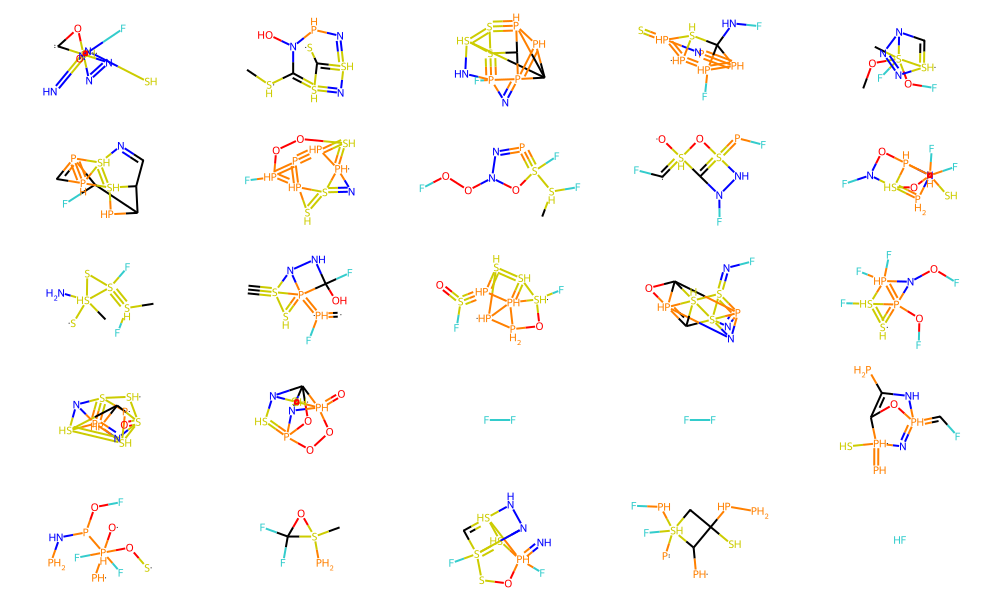

In [76]:

#obj_props, _ = trial.task.compute_obj_properties(objs)
#log_rewards = trial.task.cond_info_to_logreward({'beta': torch.ones(len(trajs))}, obj_props)
MolsToGridImage(objs[:25], molsPerRow=5, subImgSize=(200, 120))